In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
from scipy.optimize import curve_fit
%matplotlib inline


error on the peak value 0.00030319183714509664
error on the peak value 0.000561578712830705


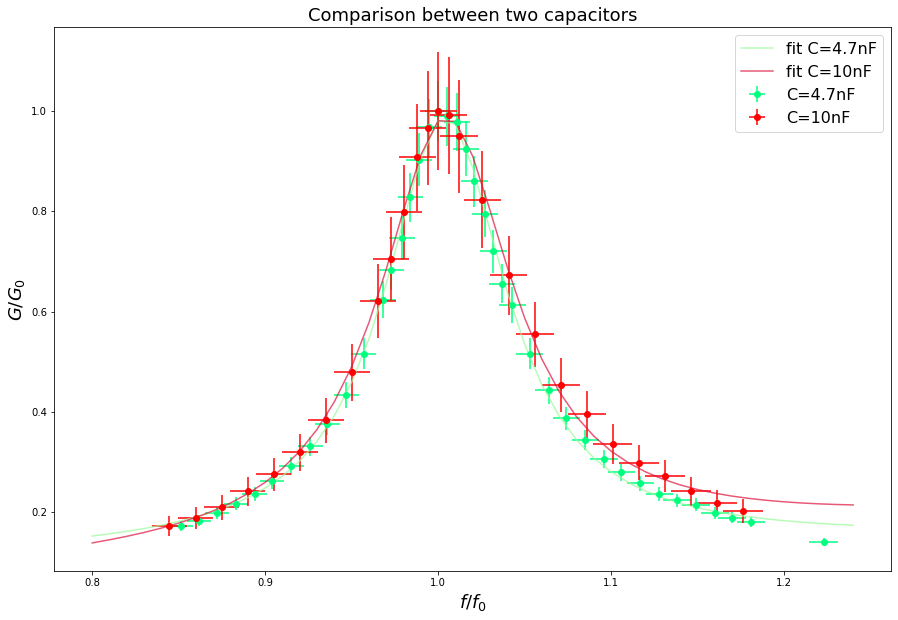

In [2]:
lor_5=pd.read_csv('47nF.txt')
lor_10=pd.read_csv('10nF.txt')

f1 = lor_5['Frequenze normalizzate']
G1 = lor_5['Guadagni normalizzati']
errf1 = lor_5['errF']
errG1 = lor_5['errG']

f2 = lor_10['Frequenze normalizzate']
G2 = lor_10['Guadagni normalizzati']
errf2 = lor_10['errF']
errG2 = lor_10['errG']

def lorentzian(f, I, f_0, S, a, b):
    return I/(1+((f-f_0)/S)**2)+a*f+b
x_fit= np.arange(0.8,1.25,0.01)

fig=plt.figure(figsize=(15,10))
plt.errorbar(f1, G1, yerr=errG1, xerr=errf1, errorevery=1, color='springgreen', fmt='o',label='C=4.7nF')
plt.errorbar(f2, G2, yerr=errG2, xerr=errf2, errorevery=1, color='red', fmt='o',label='C=10nF')
p_1, cov_1 = curve_fit(lorentzian, f1, G1, [0.8, 1, -0.08, 0.01, 0])
p_2, cov_2 = curve_fit(lorentzian, f2, G2, [0.8, 1, -0.08, 0.01, 0])
plt.plot(x_fit,lorentzian(x_fit,*p_1), '-', color='palegreen', alpha=0.7, label='fit C=4.7nF')
plt.plot(x_fit,lorentzian(x_fit,*p_2), '-', color='crimson', alpha=0.7, label='fit C=10nF')
perr1 = np.sqrt(np.diag(cov_1))[1]
print ('error on the peak value',perr1)
perr2 = np.sqrt(np.diag(cov_2))[1]
print ('error on the peak value',perr2)

plt.title('Comparison between two capacitors',fontsize=18)
plt.xlabel('$f/f_0$',fontsize=18)
plt.ylabel('$G/G_0$',fontsize=18)
plt.legend(fontsize=16)
plt.show()

In [3]:
f_0=p_1[1]*94
print('la frequenza di risonanza per C=4.7 nF è', f_0)
G_max_n=lorentzian(p_1[1], *p_1)
G_max=G_max_n*47.435
print('il guadagno massimo per C=4.7nF è', G_max, '\n', 'la resistenza dei fili è invece di', 1000/(G_max-1)-10, '\pm', (1/(G_max-1)*0.01**2+2/(G_max-1)**2*4+0.3**2)**(1/2))
L=1/(4*np.pi**2*f_0**2*1e6*4.7*1e-9)
print('la induttanza è di ', L , 'H', 'per cui ', L*1000 , 'mH')

la frequenza di risonanza per C=4.7 nF è 94.38837466599533
il guadagno massimo per C=4.7nF è 46.93568719631807 
 la resistenza dei fili è invece di 11.769566562185968 \pm 0.30625722715243764
la induttanza è di  0.0006049303719520287 H per cui  0.6049303719520287 mH


In [4]:
print('errore nella misura di r', (0.1**2+0.1**2)**(1/2))
l=14.8*1e-3
r=3.2*1e-3
mu_0=1.26*1e-6
L_th=mu_0*500**2*np.pi*r**2/l
print('the theorical value for the inductance is',L_th)

errl=0.1
errr=0.1
deL=((mu_0*2*500**2*np.pi*r/l)**2*errr**2+(mu_0*2*500**2*np.pi*r**2/l**2)**2*errl**2)**(1/2)
print('la induttanza è',L_th,'\pm',deL, 'mH')
c=1e9/(4*np.pi**2*100**2*1e6*L_th)
print(c)

errore nella misura di r 0.14142135623730953
the theorical value for the inductance is 0.0006846973826634619
la induttanza è 0.0006846973826634619 \pm 0.043782449579301844 mH
3.699487766705052


error on the peak value 0.028429348055958824
error on the peak value 0.09084089744797841


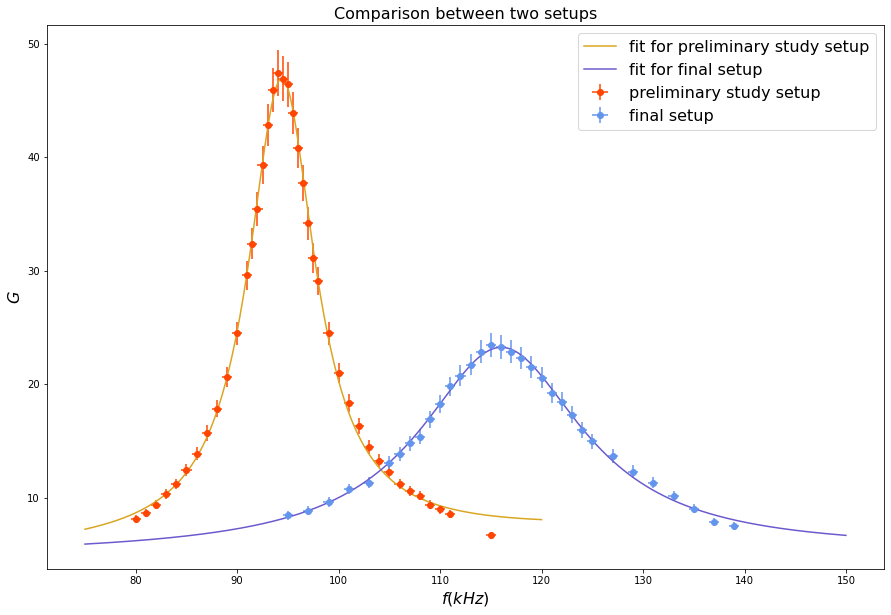

In [5]:
lor_5=pd.read_csv('47nF_nonorm.txt')
lor_10=pd.read_csv('presa2.txt')

f1 = lor_5['Frequenze']
G1 = lor_5['Guadagni']
errf1 = lor_5['errF']
errG1 = lor_5['errG']

f2 = lor_10['Frequenze']
G2 = lor_10['Guadagni']
errf2 = lor_10['errF']
errG2 = lor_10['errG']

def lorentzian(f, I, f_0, S, a, b):
    return I/(1+((f-f_0)/S)**2)+a*f+b
x_fit1= np.arange(75,120,0.01)
x_fit2= np.arange(75,150,0.01)


fig=plt.figure(figsize=(15,10))
plt.errorbar(f1, G1, yerr=errG1, xerr=errf1, errorevery=1, color='orangered', fmt='o',label='preliminary study setup')
plt.errorbar(f2, G2, yerr=errG2, xerr=errf2, errorevery=1, color='cornflowerblue', fmt='o',label='final setup')
p_1, cov_1 = curve_fit(lorentzian, f1, G1, [23.5, 94, 10, 0.01, 0])
p_2, cov_2 = curve_fit(lorentzian, f2, G2, [23.5, 115, 10, 0.01, 0])
plt.plot(x_fit1,lorentzian(x_fit1,*p_1), '-', color='goldenrod', label='fit for preliminary study setup')
plt.plot(x_fit2,lorentzian(x_fit2,*p_2), '-', color='slateblue', label='fit for final setup')
perr1 = np.sqrt(np.diag(cov_1))[1]
print ('error on the peak value',perr1)

perr2 = np.sqrt(np.diag(cov_2))[1]
print ('error on the peak value',perr2)

plt.title('Comparison between two setups', fontsize=16)
plt.xlabel('$f (kHz)$',fontsize=16)
plt.ylabel('$G$',fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [6]:
f_0=p_1[1]
print('la frequenza di risonanza per il vecchio setup è', f_0,'\pm',perr1)
G_max_n=lorentzian(p_1[1], *p_1)
G_max=G_max_n
print('il guadagno massimo per C=4.7nF è', G_max, '\n', 'la resistenza dei fili è invece di', 1000/(G_max-1)-10, '\pm', (1/(G_max-1)*0.01**2+2/(G_max-1)**2*4+0.3**2)**(1/2))
L=1/(4*np.pi**2*f_0**2*1e6*4.7*1e-9)
errC=0.3*1e-9
errF=perr1*1e3
C=4.7*1e-9
f=f_0*1e3
errL=((errF/(2*(np.pi**2)*(f**3)*C))**2+(errC/(4*(np.pi**2)*(f**2)*C**2))**2)**.5
print('la induttanza è di ', L , 'H', 'per cui ', L*1000 ,'\pm',errL*1000, 'mH')

f_0=p_2[1]
print('la frequenza di risonanza per il nuovo setup è', f_0,'\pm',perr2)
G_max_n=lorentzian(p_2[1], *p_2)
G_max=G_max_n
print('il guadagno massimo per C=4.7nF è', G_max, '\n', 'la resistenza dei fili è invece di', 1000/(G_max-1)-10, '\pm', (1/(G_max-1)*0.01**2+2/(G_max-1)**2*4+0.3**2)**(1/2))
L=1/(4*np.pi**2*f_0**2*1e6*4.7*1e-9)
errC=0.3*1e-9
errF=perr2*1e3
f=f_0*1e3
errL=((errF/(2*(np.pi**2)*(f**3)*C))**2+(errC/(4*(np.pi**2)*(f**2)*C**2))**2)**.5
print('la induttanza è di ', L , 'H', 'per cui ', L*1000 ,'\pm',errL*1000, 'mH')

la frequenza di risonanza per il vecchio setup è 94.38951270156286 \pm 0.028429348055958824
il guadagno massimo per C=4.7nF è 46.92998870724913 
 la resistenza dei fili è invece di 11.772267491155947 \pm 0.30625876359771437
la induttanza è di  0.0006049157849897845 H per cui  0.6049157849897845 \pm 0.0386133652553103 mH
la frequenza di risonanza per il nuovo setup è 116.02290951379108 \pm 0.09084089744797841
il guadagno massimo per C=4.7nF è 23.25127848527063 
 la resistenza dei fili è invece di 34.941237900642705 \pm 0.32582543337825454
la induttanza è di  0.00040036389080968176 H per cui  0.40036389080968177 \pm 0.025562830995554748 mH


In [7]:
#capacità parassita
C=1/(4*np.pi**2*f_0**2*1e6*0.60491*1e-3)*1e9

errL=0.04*1e-3
errC=((1/(2*np.pi*f_0**3*1e9*0.60491*1e-3)*perr2)**2+(1/(4*np.pi*f_0**2*1e6*0.60491**2*1e-6)*errL)**2)**(1/2)*1e9
print('la capacità si è abbassata a',C,'\pm',errC)

la capacità si è abbassata a 3.1107276897480687 \pm 0.6462210418191836


Lorenziane da 125

error on the peak value 0.12703773740042099


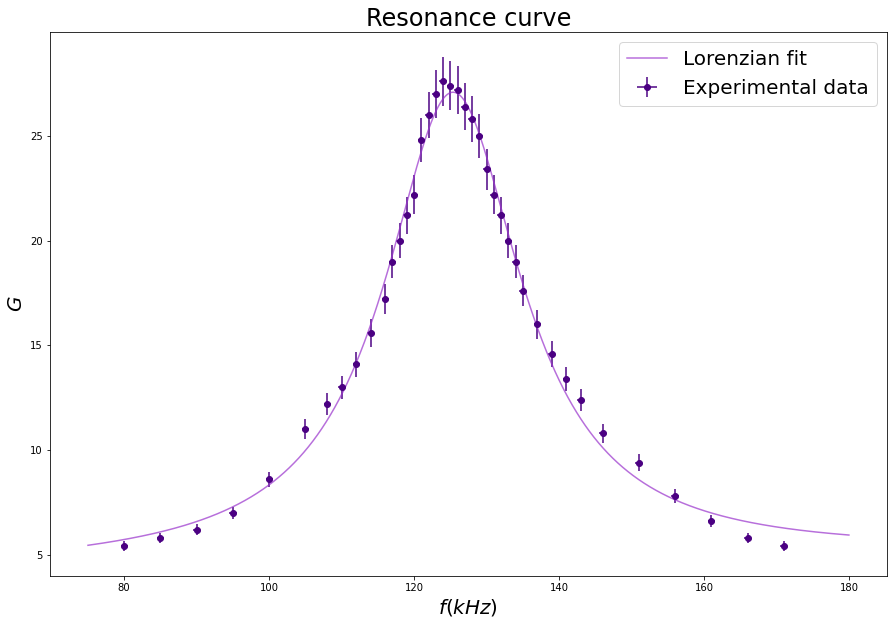

la frequenza di risonanza per il vecchio setup è 125.35808156303146 \pm 0.12703773740042099
il guadagno massimo per C=4.7nF è 27.0850987967238 
 la resistenza dei fili è invece di 28.33606335144863 \pm 0.31900009973764176
la induttanza è di  0.00034295546750640873 H per cui  0.3429554675064087 \pm 0.021901807575240174 mH


In [8]:
list_freq, list_Guad,list_errG,list_errF,list_L,list_errL,list_FWHM = [],[],[],[],[],[],[]
lor_125_1=pd.read_csv('125_1.txt')

f1 = lor_125_1['F']
G1 = lor_125_1['G']
errG1 = lor_125_1['errG']
errf1 = 0.5

def lorentzian(f, I, f_0, S, a, b):
    return I/(1+((f-f_0)/S)**2)+a*f+b
x_fit1= np.arange(75,180,0.01)


fig=plt.figure(figsize=(15,10))
plt.errorbar(f1, G1, yerr=errG1, xerr=errf1, errorevery=1, color='indigo', fmt='o',label='Experimental data')
p_1, cov_1 = curve_fit(lorentzian, f1, G1, [23.5, 125, 10, 0.01, 0])
FWHM=2*p_1[2]
list_FWHM.append(FWHM)
plt.plot(x_fit1,lorentzian(x_fit1,*p_1), '-', color='darkorchid', alpha=0.7, label='Lorenzian fit')
perr = np.sqrt(np.diag(cov_1))[1]
print ('error on the peak value',perr)
plt.title('Resonance curve', fontsize=24)
plt.xlabel('$f (kHz)$',fontsize=20)
plt.ylabel('$G$',fontsize=20)
plt.legend(fontsize=20)
plt.show()

f_0=p_1[1]
print('la frequenza di risonanza per il vecchio setup è', f_0,'\pm',perr)
list_freq.append(f_0)
list_errF.append(perr)
G_max_n=lorentzian(p_1[1], *p_1)
G_max=G_max_n
list_Guad.append(G_max)
print('il guadagno massimo per C=4.7nF è', G_max, '\n', 'la resistenza dei fili è invece di', 1000/(G_max-1)-10, '\pm', (1/(G_max-1)*0.01**2+2/(G_max-1)**2*4+0.3**2)**(1/2))
L=1/(4*np.pi**2*f_0**2*1e6*4.7*1e-9)
errC=0.3*1e-9
errF=perr*1e3
C=4.7*1e-9
f=f_0*1e3
errL=((errF/(2*(np.pi**2)*(f**3)*C))**2+(errC/(4*(np.pi**2)*(f**2)*C**2))**2)**.5
print('la induttanza è di ', L , 'H', 'per cui ', L*1000 ,'\pm',errL*1000, 'mH')
list_L.append(L*1000)
list_errL.append(errL*1000)

error on the peak value 0.14614638332948177


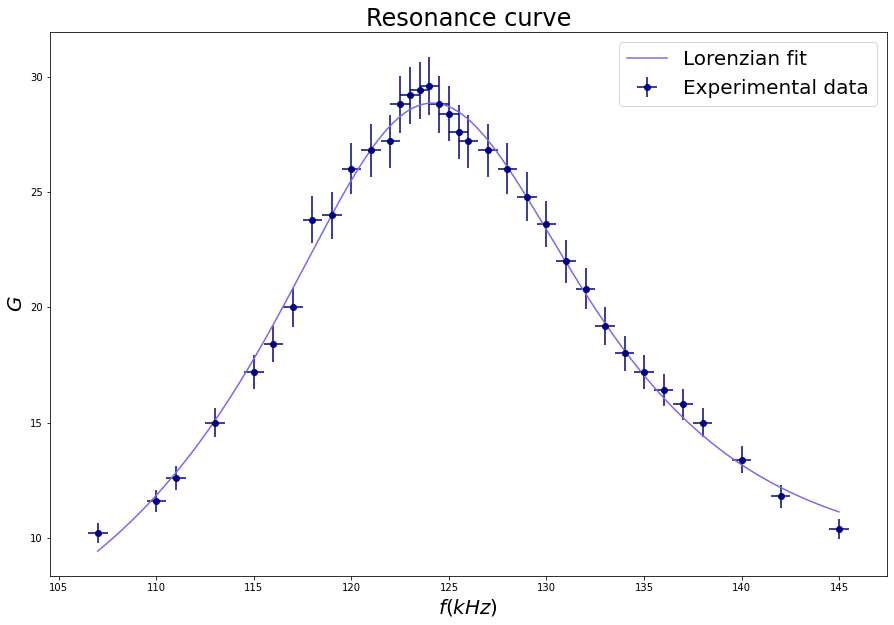

la frequenza di risonanza per il vecchio setup è 123.9220919029465 \pm 0.14614638332948177
il guadagno massimo per C=4.7nF è 28.843463894559797 
 la resistenza dei fili è invece di 25.915071622801406 \pm 0.3167376366403745
la induttanza è di  0.0003509497466671425 H per cui  0.35094974666714246 \pm 0.022416336763199568 mH


In [9]:
lor_125_2=pd.read_csv('125_2.txt')

f1 = lor_125_2['F']
G1 = lor_125_2['G']
errG1 = lor_125_2['errG']
errf1 = 0.5

def lorentzian(f, I, f_0, S, a, b):
    return I/(1+((f-f_0)/S)**2)+a*f+b
x_fit1= np.arange(107,145,0.01)


fig=plt.figure(figsize=(15,10))
plt.errorbar(f1, G1, yerr=errG1, xerr=errf1, errorevery=1, color='navy', fmt='o',label='Experimental data')
p_1, cov_1 = curve_fit(lorentzian, f1, G1, [23.5, 125, 10, 0.01, 0])
FWHM=2*p_1[2]
list_FWHM.append(FWHM)
plt.plot(x_fit1,lorentzian(x_fit1,*p_1), '-', color='mediumslateblue', label='Lorenzian fit')
perr = np.sqrt(np.diag(cov_1))[1]
print ('error on the peak value',perr)
plt.title('Resonance curve', fontsize=24)
plt.xlabel('$f (kHz)$',fontsize=20)
plt.ylabel('$G$',fontsize=20)
plt.legend(fontsize=20)
plt.show()

f_0=p_1[1]
print('la frequenza di risonanza per il vecchio setup è', f_0,'\pm',perr)
list_freq.append(f_0)
list_errF.append(perr)
G_max_n=lorentzian(p_1[1], *p_1)
G_max=G_max_n
list_Guad.append(G_max)
print('il guadagno massimo per C=4.7nF è', G_max, '\n', 'la resistenza dei fili è invece di', 1000/(G_max-1)-10, '\pm', (1/(G_max-1)*0.01**2+2/(G_max-1)**2*4+0.3**2)**(1/2))
L=1/(4*np.pi**2*f_0**2*1e6*4.7*1e-9)
errC=0.3*1e-9
errF=perr*1e3
C=4.7*1e-9
f=f_0*1e3
errL=((errF/(2*(np.pi**2)*(f**3)*C))**2+(errC/(4*(np.pi**2)*(f**2)*C**2))**2)**.5
print('la induttanza è di ', L , 'H', 'per cui ', L*1000 ,'\pm',errL*1000, 'mH')
list_L.append(L*1000)
list_errL.append(errL*1000)

[ 1.79341211e+01  1.15846302e+02 -1.02115025e+01  2.13452430e-02
  2.99640992e+00] 0.0701664271569979


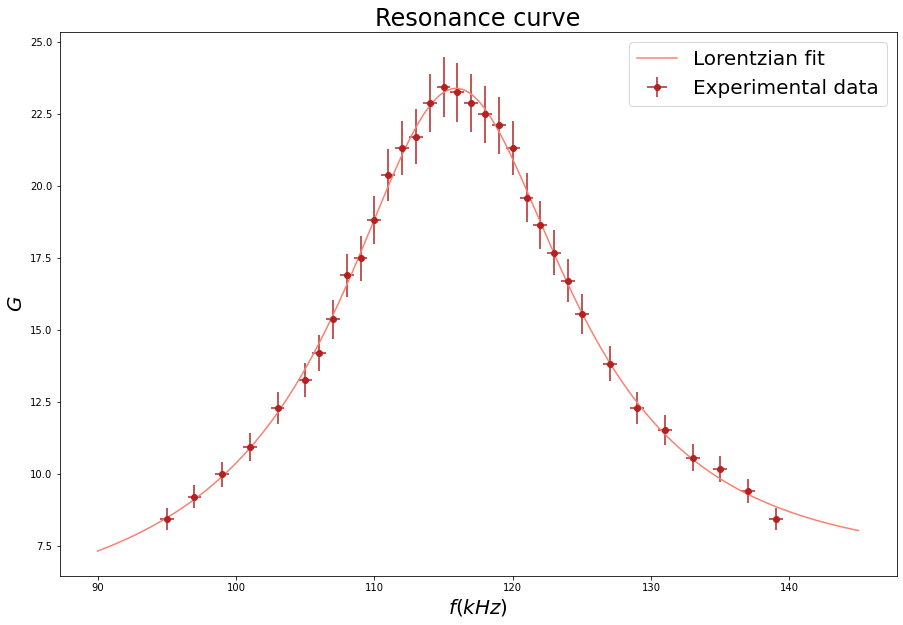

error on the peak value 0.0701664271569979
la frequenza di risonanza per il vecchio setup è 115.84630197253396 \pm 0.0701664271569979
il guadagno massimo per C=4.7nF è 23.403298522582553 
 la resistenza dei fili è invece di 34.63628420573867 \pm 0.3254898563242553
la induttanza è di  0.0004015855297871985 H per cui  0.4015855297871985 \pm 0.025637734647640128 mH


In [10]:
lor_1=pd.read_csv("presa1.txt")

f1 = lor_1['Frequenze']
G1 = lor_1['Guadagni']
errf1 = lor_1['errF']
errG1 = lor_1['errG']


def lorentzian(f, I, f_0, S, a, b):
    return I/(1+((f-f_0)/S)**2)+a*f+b
x_fit= np.arange(90,145,0.01)
fig=plt.figure(figsize=(15,10))
plt.errorbar(f1, G1, yerr=errG1, xerr=errf1, errorevery=1, color='firebrick', fmt='o',label='Experimental data')
p_1, cov_1 = curve_fit(lorentzian, f1, G1, [0.8, 115, -0.08, 0.01, 0])
FWHM=2*p_1[2]
list_FWHM.append(FWHM)
plt.plot(x_fit,lorentzian(x_fit,*p_1), '-', color='salmon', alpha=1, label='Lorentzian fit')
plt.title('Resonance curve',size=24)
plt.xlabel('$f(kHz)$', fontsize=20)
plt.ylabel('$G$', fontsize=20)
plt.legend(fontsize=20)
print(p_1,np.sqrt(cov_1[1,1]))
plt.show()

perr = np.sqrt(np.diag(cov_1))[1]
print ('error on the peak value',perr)

f_0=p_1[1]
print('la frequenza di risonanza per il vecchio setup è', f_0,'\pm',perr)
list_freq.append(f_0)
list_errF.append(perr)
G_max_n=lorentzian(p_1[1], *p_1)
G_max=G_max_n
list_Guad.append(G_max)
print('il guadagno massimo per C=4.7nF è', G_max, '\n', 'la resistenza dei fili è invece di', 1000/(G_max-1)-10, '\pm', (1/(G_max-1)*0.01**2+2/(G_max-1)**2*4+0.3**2)**(1/2))
L=1/(4*np.pi**2*f_0**2*1e6*4.7*1e-9)
errC=0.3*1e-9
errF=perr*1e3
C=4.7*1e-9
f=f_0*1e3
errL=((errF/(2*(np.pi**2)*(f**3)*C))**2+(errC/(4*(np.pi**2)*(f**2)*C**2))**2)**.5
print('la induttanza è di ', L , 'H', 'per cui ', L*1000 ,'\pm',errL*1000, 'mH')
list_L.append(L*1000)
list_errL.append(errL*1000)

[ 1.81232608e+01  1.16022911e+02 -9.84174865e+00  4.67637642e-03
  4.58544842e+00] 0.09084156998683031


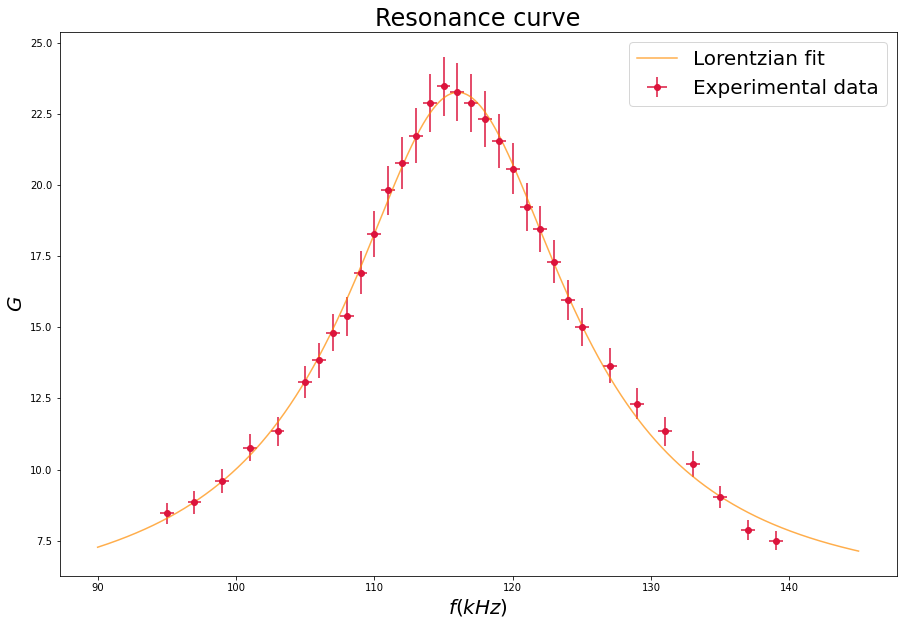

error on the peak value 0.09084156998683031
la frequenza di risonanza per il vecchio setup è 116.02291114820908 \pm 0.09084156998683031
il guadagno massimo per C=4.7nF è 23.251276043022028 
 la resistenza dei fili è invece di 34.941242833289046 \pm 0.32582543882190745
la induttanza è di  0.0004003638795298072 H per cui  0.40036387952980723 \pm 0.02556283038896397 mH


In [11]:
lor_2=pd.read_csv("presa2.txt")

f1 = lor_2['Frequenze']
G1 = lor_2['Guadagni']
errf1 = lor_2['errF']
errG1 = lor_2['errG']


def lorentzian(f, I, f_0, S, a, b):
    return I/(1+((f-f_0)/S)**2)+a*f+b
x_fit= np.arange(90,145,0.01)

fig=plt.figure(figsize=(15,10))
plt.errorbar(f1, G1, yerr=errG1, xerr=errf1, errorevery=1, color='crimson', fmt='o',label='Experimental data')
p_1, cov_1 = curve_fit(lorentzian, f1, G1, [0.8, 116, -0.08, 0.01, 0])
FWHM=2*p_1[2]
list_FWHM.append(FWHM)
plt.plot(x_fit,lorentzian(x_fit,*p_1), '-', color='darkorange', alpha=0.7, label='Lorentzian fit')
plt.title('Resonance curve', size=24)
plt.xlabel('$f(kHz)$', fontsize=20)
plt.ylabel('$G$', fontsize=20)
plt.legend(fontsize=20)
print(p_1,np.sqrt(cov_1[1,1]))
plt.show()

perr = np.sqrt(np.diag(cov_1))[1]
print ('error on the peak value',perr)

f_0=p_1[1]
print('la frequenza di risonanza per il vecchio setup è', f_0,'\pm',perr)
list_freq.append(f_0)
list_errF.append(perr)
G_max_n=lorentzian(p_1[1], *p_1)
G_max=G_max_n
list_Guad.append(G_max)
print('il guadagno massimo per C=4.7nF è', G_max, '\n', 'la resistenza dei fili è invece di', 1000/(G_max-1)-10, '\pm', (1/(G_max-1)*0.01**2+2/(G_max-1)**2*4+0.3**2)**(1/2))
L=1/(4*np.pi**2*f_0**2*1e6*4.7*1e-9)
errC=0.3*1e-9
errF=perr*1e3
C=4.7*1e-9
f=f_0*1e3
errL=((errF/(2*(np.pi**2)*(f**3)*C))**2+(errC/(4*(np.pi**2)*(f**2)*C**2))**2)**.5
print('la induttanza è di ', L , 'H', 'per cui ', L*1000 ,'\pm',errL*1000, 'mH')
list_L.append(L*1000)
list_errL.append(errL*1000)

In [12]:
list_freq[1]=124.9
freq1=((list_freq[0]/list_errF[0]**2)+(list_freq[1]/list_errF[1]**2))/(1/list_errF[0]**2+1/list_errF[1]**2)

freq2=((list_freq[2]/list_errF[2]**2)+(list_freq[3]/list_errF[3]**2))/(1/list_errF[2]**2+1/list_errF[3]**2)
errf1=(1/(1/list_errF[0]**2+1/list_errF[1]**2))**.5
errf2=(1/(1/list_errF[2]**2+1/list_errF[3]**2))**.5
print(freq1,'\pm',errf1,'mentre per conduttore normale',freq2,'\pm',errf2)
jump=freq1-freq2
errj=(errf1**2+errf2**2)**.5
print('la differenza fra le due è',jump,'\pm',errj)

125.16092660086285 \pm 0.09587834353493746 mentre per conduttore normale 115.9122959462864 \pm 0.05553031531455215
la differenza fra le due è 9.248630654576445 \pm 0.11079834239706418


In [13]:
list_Guad[0]=27.9
list_errG=[1.17,1.26,1.04,1.04]
print(list_Guad)
Guad1=((list_Guad[0]/list_errG[0]**2)+(list_Guad[1]/list_errG[1]**2))/(1/list_errG[0]**2+1/list_errG[1]**2)
errGuad1=(1/(1/list_errG[0]**2+1/list_errG[1]**2))**.5
errGuad2=(1/(1/list_errG[2]**2+1/list_errG[3]**2))**.5
print(Guad1,'\pm',errGuad1)
Guad2=((list_Guad[2]/list_errG[2]**2)+(list_Guad[3]/list_errG[3]**2))/(1/list_errG[2]**2+1/list_errG[3]**2)
print(Guad2,'\pm',errGuad2)

[27.9, 28.843463894559797, 23.403298522582553, 23.251276043022028]
28.336836707344123 \pm 0.85736838520277
23.32728728280229 \pm 0.7353910524340095


In [14]:
L1=((list_L[0]/list_errL[0]**2)+(list_L[1]/list_errL[1]**2))/(1/list_errL[0]**2+1/list_errL[1]**2)
errL1=(1/(1/list_errL[0]**2+1/list_errL[1]**2))**.5
errL2=(1/(1/list_errL[2]**2+1/list_errL[3]**2))**.5
print(L1,'\pm',errL1)
L2=((list_L[2]/list_errL[2]**2)+(list_L[3]/list_errL[3]**2))/(1/list_errL[2]**2+1/list_errL[3]**2)
print(L2,'\pm',errL2)

0.34685980682016604 \pm 0.015665662447949945
0.4009729174397294 \pm 0.018102075254551805


In [15]:
list_FWHM

[23.09834653301102,
 21.369555117051046,
 -20.423004943153188,
 -19.68349730529134]

In [92]:
R_coil=10 
print('la resistenza della bobina a 293 kelvin è di ', R_coil,' ohm e si è riscontrata una resistenza equivalente a 293 kelvin con il nuovo setup di', 34.7+R_coil,' ohm mentre a 50 Kelvin di ', 28+R_coil , 'ohm \n' , 'una parte della resistenza, quella della bobina, è cambiata per via del cambiamento di temperatura, quantifichiamo di quanto:' )
#copper resistivity after cooling:
R_c=10*(1+0.0036*(65-293.15))
err_R_c=0.3*R_c
print('the lowered value of the coil is',R_c,'\pm',err_R_c)
R_jump=34.6-28
R_before=34.7
R_after1=38.3-R_c
R_after2=37.9-R_c
print('la variazione di resistenza dovrebbe essere di', 10-R_c, 'e sperimentalmente abbiamo riscontrato una variazione di', R_jump)
print('le resistenze dei fili sono di',R_before, 'e', R_after1,R_after2)
Q1=2*np.pi*115.91*10**3*0.40*1e-3/(34.6+R_coil)
Q2=2*np.pi*125.16*10**3*0.34*1e-3/(28+R_coil)

err_Q1=((2*np.pi*0.40)**2*0.06**2/(34.6+R_coil)**2+(2*np.pi*1e3*115.91)**2*0.03**2*1e-6/(34.6+R_coil)**2+(2*np.pi*1e3*115.91*0.40*1e-3)**2*0.3**2/(34.6+R_coil)**4)**.5
err_Q2=((2*np.pi*0.34)**2*0.09**2/(28+R_coil)**2+(2*np.pi*1e3*125.16)**2*0.02**2*1e-6/(28+R_coil)**2+(2*np.pi*1e3*125.16*0.34*1e-3)**2*0.3**2/(28+R_coil)**4)**.5

print('the quality factor is before cooling:',Q1,'\pm',err_Q1,'and after cooling',Q2,'\pm',err_Q2)

la resistenza della bobina a 293 kelvin è di  10  ohm e si è riscontrata una resistenza equivalente a 293 kelvin con il nuovo setup di 44.7  ohm mentre a 50 Kelvin di  38 ohm 
 una parte della resistenza, quella della bobina, è cambiata per via del cambiamento di temperatura, quantifichiamo di quanto:
the lowered value of the coil is 1.7866000000000015 \pm 0.5359800000000005
la variazione di resistenza dovrebbe essere di 8.213399999999998 e sperimentalmente abbiamo riscontrato una variazione di 6.600000000000001
le resistenze dei fili sono di 34.7 e 36.5134 36.1134
the quality factor is before cooling: 6.531695147580142 \pm 0.4918549982216426 and after cooling 7.036241600943236 \pm 0.41763822633172226


In [94]:
B1=115.91/Q1
B2=125.16/Q2
err_B1=(0.06**2/6.5**2+(115.91*0.5/6.5**2)**2)**.5
err_B2=(0.09**2/7.0**2+(125.16*0.4/7.0**2)**2)**.5
print('la banda passante sarà data da ',B1,'\pm',err_B1, 'nel primo caso e nel sencondo',B2,'\pm',err_B2,'kHz')
print('gli intervalli sono', 115.91-B1, 115.91+B1, 'e', 125.16-B2, 125.16+B2 )


la banda passante sarà data da  17.74577615474633 \pm 1.3717470345596852 nel primo caso e nel sencondo 17.787905404388304 \pm 1.0217951789645037 kHz
gli intervalli sono 98.16422384525367 133.65577615474632 e 107.37209459561169 142.9479054043883
